<a href="https://colab.research.google.com/github/mdelvecchio2019/Stats2023fall/blob/main/CompleteFinal_Delvecchio_Maddy_Stats2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


https://docs.google.com/presentation/d/1_WrZy_QCafujO7rsNi2JzLTM1Pco_ZmyftWB700o7Dk/edit#slide=id.g1af5f86b539_0_272

In [ ]:
%%capture
!pip install wandb #refers us to the weights and biases website which lets us monitor the training and tracking of data in real time
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch #flashtorch is a visualition tooklit for neureal networks in python
import requests
from pdf2image import convert_from_path # converts a pdf to an image 
import matplotlib.pyplot as plt #allows us to plot data for images or graphs
import numpy as np #we always start with numpy
import torch # allows the ability to define mathematical equations 
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb #imports weights and biases 

In [ ]:
def GPU(data): #GPU sends the data to the chip 
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #this makes it easier to see our data
    fig, ax = plt.subplots() #this plots multiple plots on a singular figure 
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show() #shows us the data 
    
def get_google_slide(url): #imports our data from the google slide 
    url_head = "https://docs.google.com/presentation/d/"#splitting the url by head and body
    url_body = url.split('/')[5]#splitting the url by head and body
    page_id = url.split('.')[-1] #identifies each page as well as tells where to split
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #returning the functions as one function 

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image): #loading the images from the data 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) #transforms the data into a torch.tens allowing it to be read 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1_WrZy_QCafujO7rsNi2JzLTM1Pco_ZmyftWB700o7Dk/edit#slide=id.g1af5f86b539_0_272"

this is the url where our images for our data are

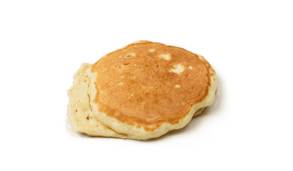

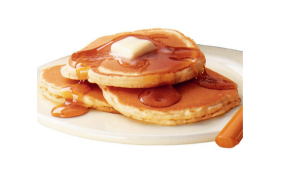

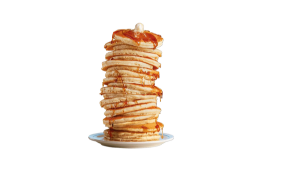

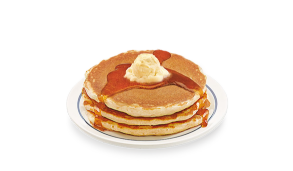

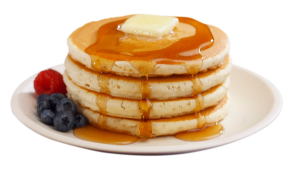

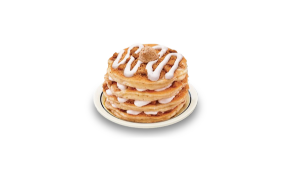

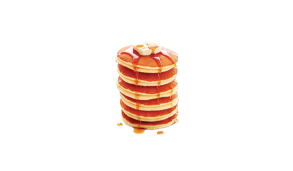

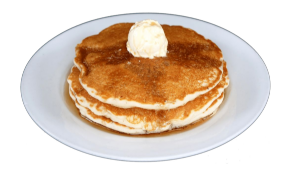

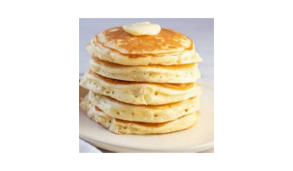

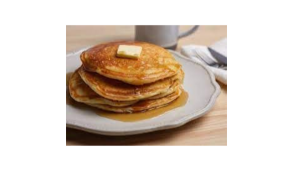

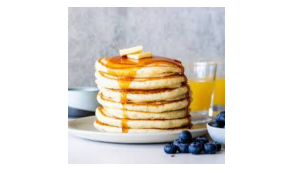

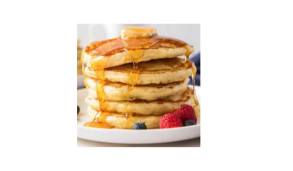

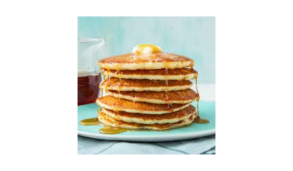

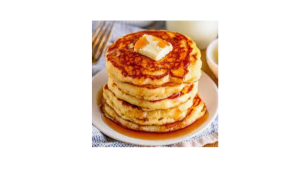

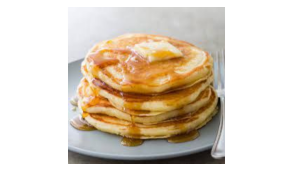

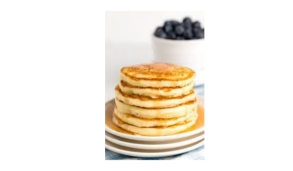

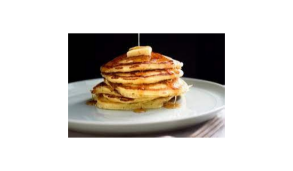

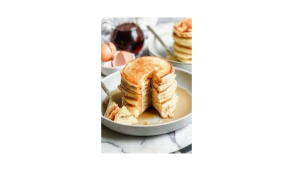

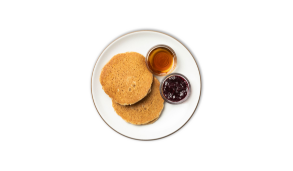

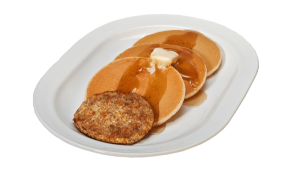

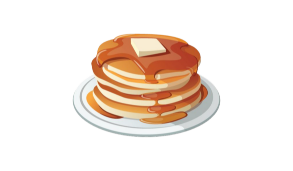

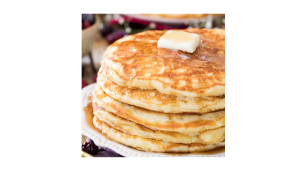

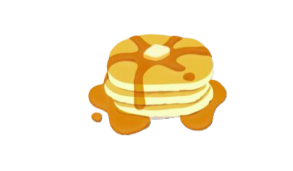

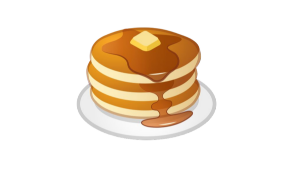

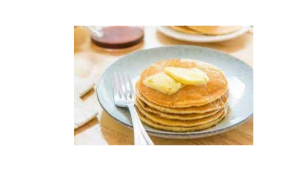

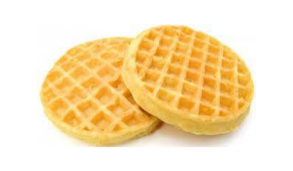

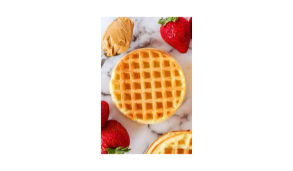

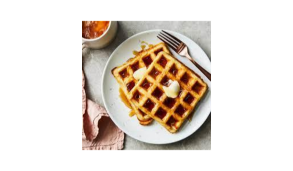

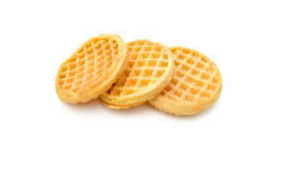

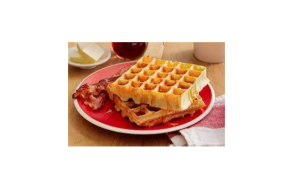

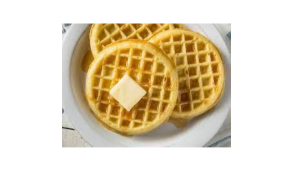

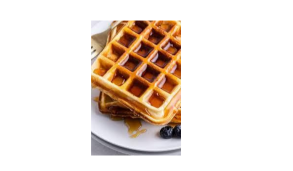

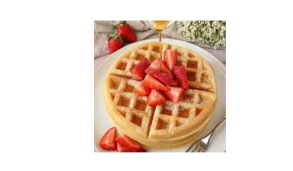

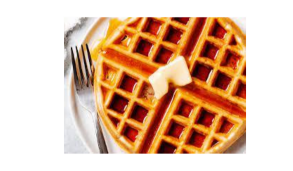

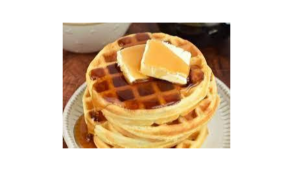

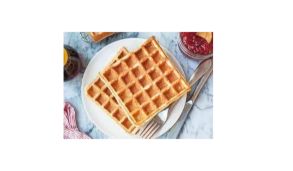

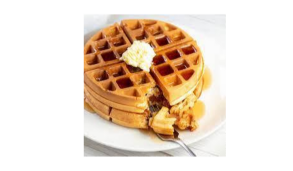

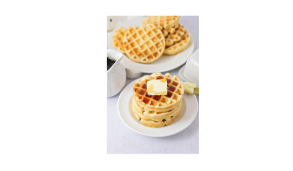

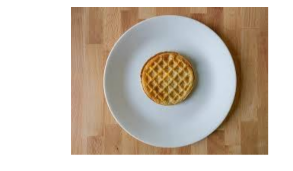

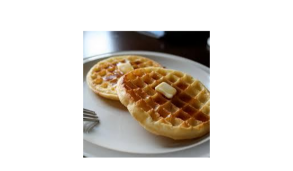

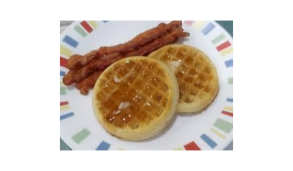

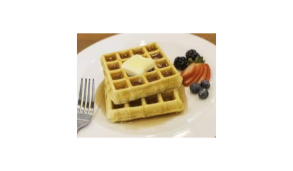

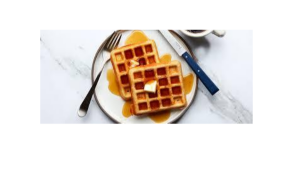

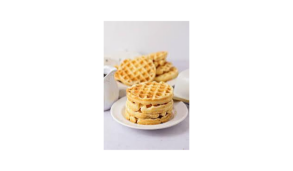

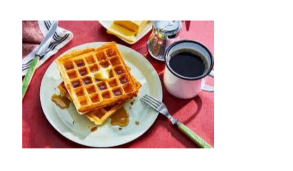

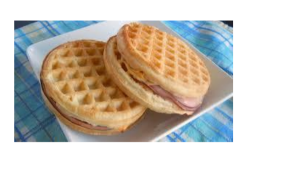

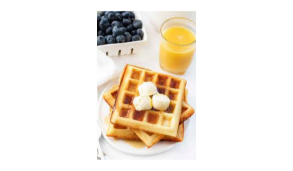

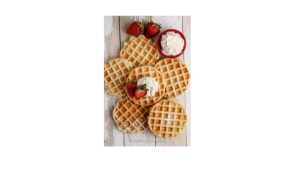

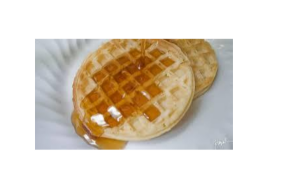

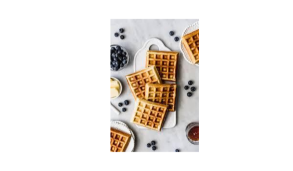

In [ ]:
images = []

for image in get_slides(url): #taking the images from the sildes

    plot(image) #displaying the images 

    images.append(load(image)) #loading the images into the lab 

images = torch.vstack(images) # retriving the images from our data sets where the images are

In [ ]:
images.shape #telling us the amount of images we have the grayscale, and the sizes 

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) #retrieving the sizes of the images 

tensor([[-5.6075, -0.6011, -5.8533,  ...,  6.8470,  6.3704,  3.7084],
        [-1.3444,  1.4595, -3.3351,  ...,  3.7857,  5.1069,  0.0664],
        [ 0.8193,  2.3167, -4.8131,  ...,  0.0184,  7.2795,  1.6282],
        ...,
        [-2.8095,  0.5973, -5.7878,  ...,  0.1325,  6.9079,  2.7844],
        [-0.5706,  1.2139, -5.5819,  ...,  0.9865, 10.6126,  2.5070],
        [-2.9842,  0.2160, -5.2223,  ..., -3.1257,  4.9422,  5.7118]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) #making the variable y equal to the images 

In [ ]:
y.shape #telling us how many pixels we have 

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() #taking the elements from the inout tensor and returns the sum of them

In [ ]:
for i in list(guesses):
    print(labels[i]) #classifying everything trained in the network

French loaf
bagel, beigel
coil, spiral, volute, whorl, helix
bagel, beigel
bagel, beigel
pretzel
coil, spiral, volute, whorl, helix
potpie
sunscreen, sunblock, sun blocker
French loaf
pretzel
potpie
plate rack
waffle iron
bakery, bakeshop, bakehouse
sunscreen, sunblock, sun blocker
waffle iron
waffle iron
face powder
French loaf
mixing bowl
potpie
pill bottle
mixing bowl
eggnog
honeycomb
honeycomb
waffle iron
ear, spike, capitulum
waffle iron
chiton, coat-of-mail shell, sea cradle, polyplacophore
waffle iron
carbonara
waffle iron
chocolate sauce, chocolate syrup
waffle iron
waffle iron
waffle iron
consomme
waffle iron
potpie
abacus
waffle iron
waffle iron
waffle iron
potpie
pill bottle
hamper
honeycomb
safety pin


In [ ]:
Y = np.zeros(50,) #making a new array with a new variable to get given shapes and fills with values of zero 50 times
Y[25:] = 1 #makes the first 25 values equal to 0 and then the rest equal to 1

In [ ]:
Y #printing the array data 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() #detaches a tensor from the current computational graph 

In [ ]:
X.shape #tells us the size of the images 

(50, 1000)

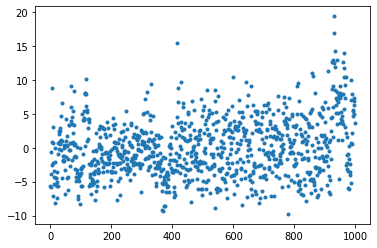

In [ ]:
plt.plot(X[0],'.') #plotting the data of what the model believes about the image

In [ ]:
X[0] #printing the data of x 

array([-5.60753107e+00, -6.01140201e-01, -5.85332251e+00, -3.92107868e+00,
       -2.52895737e+00,  8.78198338e+00,  7.78315187e-01, -2.24048066e+00,
        3.02285242e+00, -7.06055307e+00,  6.94751441e-01, -5.42266989e+00,
       -4.34022045e+00, -3.43200088e+00, -8.22451687e+00, -7.97817111e-02,
       -2.04048514e+00, -5.42469835e+00, -4.44032526e+00, -4.53785753e+00,
       -5.11018562e+00, -5.64693642e+00, -3.53425789e+00, -7.45810223e+00,
       -5.68370867e+00,  6.39685869e-01, -9.09686387e-01,  2.49355936e+00,
       -1.71644509e-01,  2.07620978e+00,  1.06202936e+00,  2.51195955e+00,
        2.90462923e+00,  5.05467415e-01,  1.08252358e+00, -2.82759666e-01,
        4.68881321e+00,  1.05657458e+00,  6.52300167e+00, -4.44050264e+00,
       -1.82198143e+00, -1.89159107e+00, -1.24850190e+00, -1.52008533e-02,
        3.57142150e-01, -1.15787470e+00, -1.98975122e+00,  3.08598816e-01,
       -6.83975649e+00, -3.35768080e+00, -1.37679434e+00,  1.02818871e+00,
        4.25169277e+00,  

In [ ]:
np.argmax(X[0]) # returns the indices of the max values along the axis 

930

In [ ]:
labels[948] #establishing the each number puts a random label on things 

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] # shows the labels for the top ten images out of the images from the slides

In [ ]:
for i in top_ten:
    print(labels[i]) #showing us the labels for the top 10 results of the image data in the slides 

French loaf
bagel, beigel
bakery, bakeshop, bakehouse
cheeseburger
potpie
ice cream, icecream
spaghetti squash
plate
dough
pretzel


In [ ]:
labels #tells what the system believes images might be 

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 34., 148., 265., 247., 169.,  87.,  36.,   9.,   3.,   2.]),
 array([-9.762079 , -6.847291 , -3.9325023, -1.0177139,  1.8970745,
         4.811863 ,  7.726651 , 10.641439 , 13.556229 , 16.471016 ,
        19.385805 ], dtype=float32),
 <a list of 10 Patch objects>)

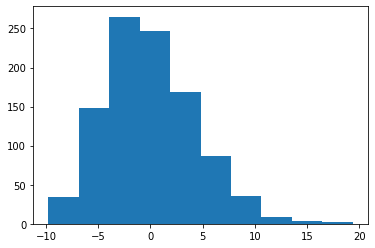

In [ ]:
plt.hist(X[0]) #plotting the data in a histogram 

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y) #creating variuos attributes that will be used ina CUDA-based GPU compute

In [ ]:
def softmax(x): #makes each element of the collection transform by computong the exponential element of each element divde 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels): #optimizing used for training classification models that classify data via predictive probablility of whether the data belong to 1 class or another             
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #Truncated Normal Random Numbers 

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): #measuring where we can get the maximum output out of all the outputs 
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape #tells us the size of the data and how many pixels we have 

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): #gives us a portion of the data 
    b = c.b
    if mode == "train": #gives us a smaller portion of the data
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): #defining the data model 

    return x@w[0]

In [ ]:
def make_plots(): #making plots 
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");  #makes a chart for us and how well is out classification happening
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000 #how many times we run it

w = [GPU(Truncated_Normal((1000,2)))] #starts our model randomly

optimizer = torch.optim.Adam(w, lr=c.h)   #update w

for i in range(c.epochs):

    x,y = get_batch('train') #gets a small batch of the data
 
    loss = cross_entropy(softmax(model(x,w)),y) #softmax maks sure everything adds up

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▃▅▃▃▅▅▄▄▆▇▃▂▄▃█▅▇█▁▅██▆▅▆▆▄▅▃▄▆▄▇▄▃▁▃▅▅▅
loss,▆▄▆▆▄▄▅▅▃▂▆▇▅▆▁▄▂▁█▄▁▁▃▄▃▃▅▄▆▅▃▅▂▅▆█▆▄▄▄
acc_train,0.46875
loss,0.84451


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


I ran 3 tests; royal plant 7, zany puddle 8, and olive water 6: 
https://wandb.ai/mdelvecchio2019/Linear_Model_Photo_1/reports/acc_train-22-12-14-00-07-36---VmlldzozMTQ2MTUw?accessToken=poyadm60rtu8zy9rtnhpl2ryxg6f8s9prsh6pyfqkpk1f2dshjzcxhke6hvy1ec9


Reports: 
*   Best-> ***royal plant 7*** with a high of 1.00076 and the loss was 0.3125
*   Worst-> ***zany puddle 8 and olive water 6*** both had the least with 0.84451 and the loss was 0.46875


*   Average acc based off all 3 runs-> **0.89693**
*   Average loss based off all 3 runs-> **0.41667**

https://tensorspace.org/